## Data Science question: WHAT MAKES A COUNTRY HAPPY?

Guide:
1. What is the distribution of happiness scores around the world?
2. How does each happiness factor correlate with the overall score?
3. How does each happiness factor correlate with one another?
4. What are the most and least sources of happiness for the top and bottom 10 countries?

- Data source: https://www.kaggle.com/unsdsn/world-happiness?select=2019.csv

### Other References:
- https://www.kaggle.com/sabihaif/world-happiness-report-analysis
- https://www.kaggle.com/saviola07/world-happiness-report-analysis
- https://www.kaggle.com/koki25ando/data-analysis-of-world-happiness-report

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import plotly.graph_objs as go # plotly graphical object
import chart_studio
chart_studio.tools.set_config_file(world_readable=False, sharing='private')
from string import ascii_letters
import warnings
warnings.filterwarnings('ignore')

import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
plt.style.use('tableau-colorblind10') #seaborn-whitegrid #tableau-colorblind10 #fivethirtyeight
textColor = '#006680' 
highlightColor = '#3b738f'

# Let's explore 2019 data

In [28]:
# Load 2019 deep dive data 
df = pd.read_csv(r'C:\Users\ACER\Desktop\DLSU\[WIP] Data Sci Project\2019.csv')
df['Year'] = df['Year'].astype(object)
df.rename(columns = {'Happiness Rank' : 'Happiness_Rank',
                           'Happiness Score' : 'Happiness_Score',
                           'Standard Error' : 'Standard_Error',
                           'Economy (GDP per Capita)' : 'Economy',
                           'Health (Life Expectancy)' : 'Health',
                          'Trust (Government Corruption)' : 'Government Trust',
                          'Dystopia Residual' : 'Dystopia_Residual',
                             'Social Support': 'Social_Support'}, inplace = True)
df.head()

,Year,Country,Continent,Happiness_Rank,Happiness_Score,Economy,Social_Support,Health,Freedom,Generosity,Government Trust
0,2019,Finland,Europe,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2019,Denmark,Europe,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,2019,Norway,Europe,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,2019,Iceland,Europe,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,2019,Netherlands,Europe,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [29]:
df.describe()

,Happiness_Rank,Happiness_Score,Economy,Social_Support,Health,Freedom,Generosity,Government Trust
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [40]:
df.isna().sum()

Year                0
Country             0
Continent           0
Happiness_Rank      0
Happiness_Score     0
Economy             0
Social_Support      0
Health              0
Freedom             0
Generosity          0
Government Trust    0
dtype: int64

## Distribution of Happiness Scores

- Bimodal distribution
- Spread across the countries
- Mean and Median are almost the same values

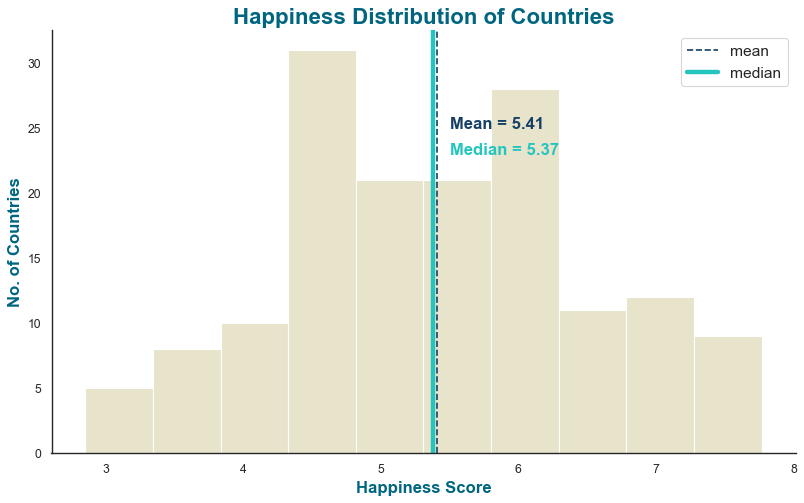

In [31]:
# Add actual mean and median values in the box!!!

fig_dims = (13, 7)
fig, ax = plt.subplots(figsize=fig_dims,  dpi=80)

ax = df['Happiness_Score'].hist(edgecolor='w', figsize=(12, 7), color='#E7E4CB')

ax.set_title('Happiness Distribution of Countries', color='#006680', fontsize=20, fontweight='bold')
ax.set_xlabel('Happiness Score', color='#006680', fontsize=15, fontweight='bold')
ax.set_ylabel('No. of Countries', color='#006680', fontsize=15, fontweight='bold');

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)

ax.axvline(x=df['Happiness_Score'].mean(), color='#164066', linestyle='--', label='mean')
ax.axvline(x=df['Happiness_Score'].median(), color='#25C5BF', linewidth=4, label='median')

plt.text(5.5,25, 'Mean = 5.41', fontweight='bold', fontsize = 15, color='#164066')
plt.text(5.5,23, 'Median = 5.37', fontweight='bold', fontsize = 15, color='#25C5BF')

ax.legend(fontsize=14);

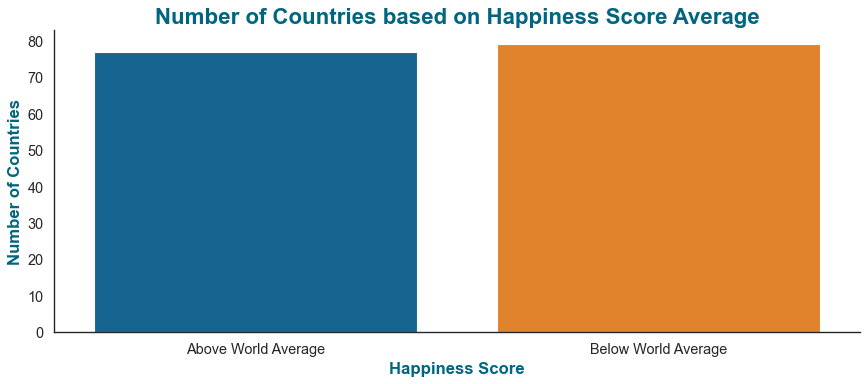

In [42]:
above_mean_HS =['Above World Average' if i >= 5.40 else 'Below World Average' for i in df.Happiness_Score]
df_meandiv = pd.DataFrame({'Happiness_Score' : above_mean_HS})

fig_dims = (13, 5)
fig, ax = plt.subplots(figsize=fig_dims,  dpi=80)

sns.countplot(x = df_meandiv.Happiness_Score)
plt.xlabel('Happiness Score', color='#006680', fontsize=15, fontweight='bold')
plt.ylabel('Number of Countries', color='#006680', fontsize=15, fontweight='bold')
plt.title('Number of Countries based on Happiness Score Average', color='#006680', fontweight='bold', fontsize=20,)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(fontsize=13, rotation=0)
plt.yticks(fontsize=13, rotation=0)

plt.style.use('tableau-colorblind10') #seaborn-whitegrid #tableau-colorblind10 #fivethirtyeight
plt.show()

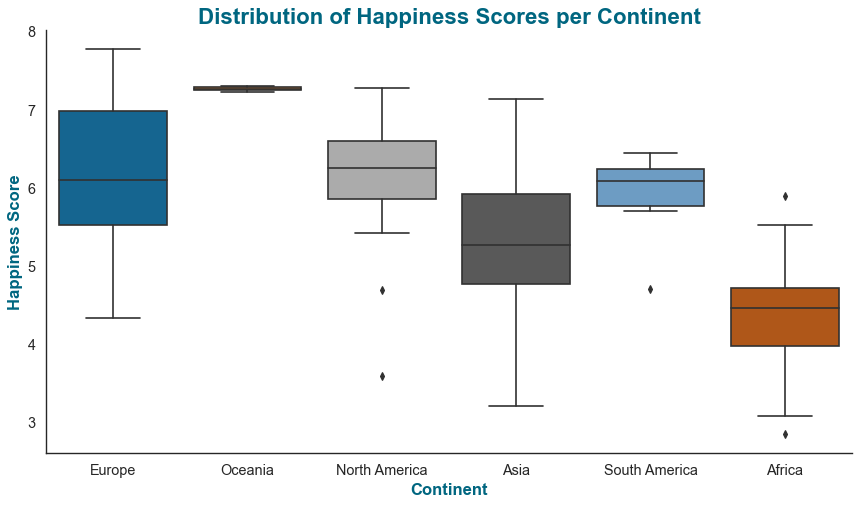

In [35]:
# Create a boxplot
plt.style.use('tableau-colorblind10')

fig_dims = (13, 7)
fig, ax = plt.subplots(figsize=fig_dims,  dpi=80)

sns.boxplot(data=df, x=df['Continent'], y=df['Happiness_Score'])

ax.set_title('Distribution of Happiness Scores per Continent', color='#006680', fontweight='bold', fontsize=20,)
ax.set_ylabel('Happiness Score', color='#006680', fontsize=15, fontweight='bold');
ax.set_xlabel('Continent', color='#006680', fontsize=15, fontweight='bold');

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(fontsize=13, rotation=0)
plt.yticks(fontsize=13, rotation=0)


plt.show()

In [43]:
data = [dict(
        type='choropleth',
        colorscale = 'RdYlGn', #algae #darkmint #RdYlGn
        locations = df['Country'],
        z = df['Happiness_Score'],
        locationmode = 'country names',
        text = df['Country'],
        marker_line_color='darkgray',
        marker_line_width=0.5,
        colorbar = dict(
        title = 'Happiness Score', 
        titlefont=dict(size=13),
        tickfont=dict(size=13))
)]
layout = dict(
    title = 'Happiness Score',
    titlefont = dict(size=20),
    geo = dict(
        showframe = True,
        showcoastlines = True,
        projection = dict(type = 'equirectangular')
        )
)
choromap = go.Figure(data = data, layout = layout)
choromap

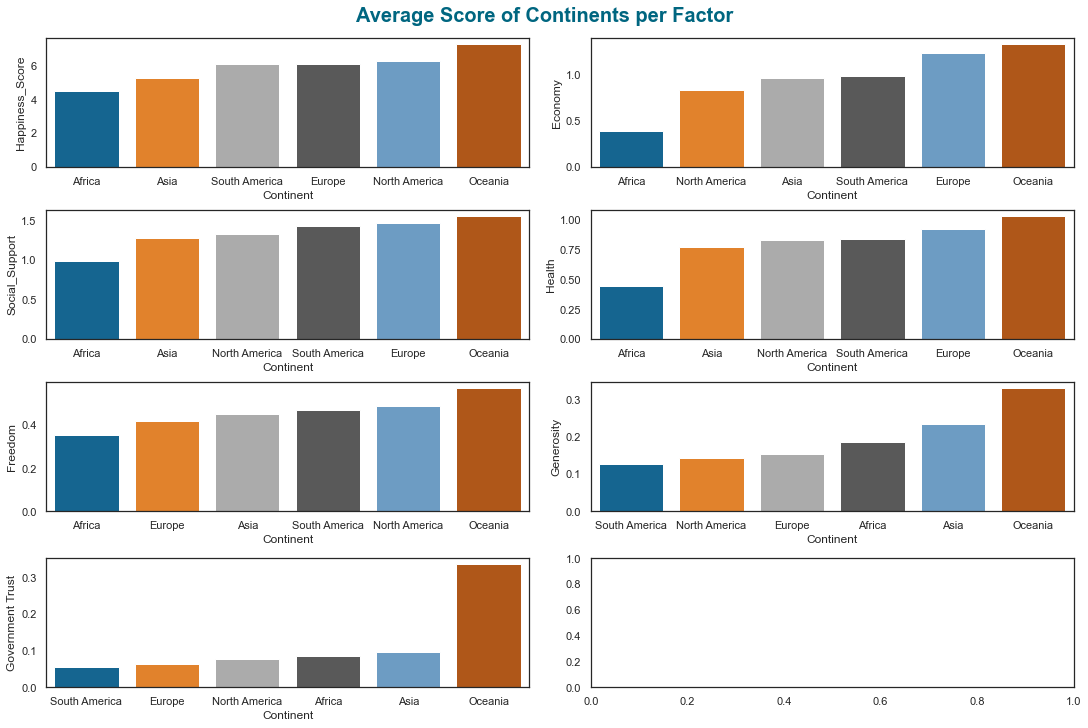

In [44]:
score = df.groupby(["Continent"])['Happiness_Score'].aggregate(np.median).reset_index().sort_values('Happiness_Score')
economy = df.groupby(["Continent"])['Economy'].aggregate(np.median).reset_index().sort_values('Economy')
social = df.groupby(["Continent"])['Social_Support'].aggregate(np.median).reset_index().sort_values('Social_Support')
health = df.groupby(["Continent"])['Health'].aggregate(np.median).reset_index().sort_values('Health')
freedom = df.groupby(["Continent"])['Freedom'].aggregate(np.median).reset_index().sort_values('Freedom')
generosity = df.groupby(["Continent"])['Generosity'].aggregate(np.median).reset_index().sort_values('Generosity')
trust = df.groupby(["Continent"])['Government Trust'].aggregate(np.median).reset_index().sort_values('Government Trust')
meanfacet = score.merge(economy).merge(social).merge(health).merge(freedom).merge(generosity).merge(trust)

fig, axes = plt.subplots(nrows=4, ncols=2, constrained_layout=True, figsize=(15,10))
fig.suptitle('Average Score of Continents per Factor', color='#006680', fontweight='bold', fontsize=20)

sns.barplot(x='Continent', y='Happiness_Score',data=meanfacet,ax=axes[0,0], order=meanfacet.sort_values('Happiness_Score').Continent)
sns.barplot(x='Continent', y='Economy',data=meanfacet,ax=axes[0,1], order=meanfacet.sort_values('Economy').Continent)
sns.barplot(x='Continent', y='Social_Support', data=meanfacet,ax=axes[1,0], order=meanfacet.sort_values('Social_Support').Continent)
sns.barplot(x='Continent', y='Health', data=meanfacet,ax=axes[1,1], order=meanfacet.sort_values('Health').Continent)
sns.barplot(x='Continent', y='Freedom', data=meanfacet,ax=axes[2,0], order=meanfacet.sort_values('Freedom').Continent)
sns.barplot(x='Continent', y='Generosity', data=meanfacet,ax=axes[2,1], order=meanfacet.sort_values('Generosity').Continent)
sns.barplot(x='Continent', y='Government Trust', data=meanfacet,ax=axes[3,0], order=meanfacet.sort_values('Government Trust').Continent)

plt.style.use('tableau-colorblind10') #tableau-colorblind10
plt.show()

# how to assign color per continent

# General Analysis
## Take a closer look - how each factor affects overall happiness or one another

Economy, Social Support, and Healthy Life Expectancy have a strong degree of relationship with the Happiness Score. As each of these factors increases, the overall Happiness Score increases as well.

Factor to factor analysis shows strong degree of relationship between the following:
- Economy-Social Support 
- Economy-Healthy Life Expectancy
- Social Support-Healthy Life Expectancy


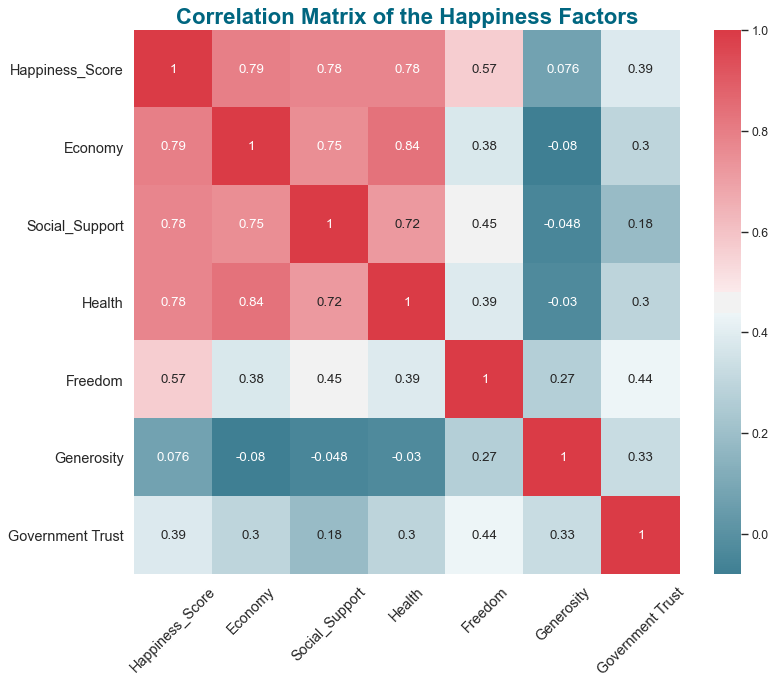

In [52]:
df4 = df.drop(['Happiness_Rank', 'Year'], 1)

fig_dims = (11, 9)
fig, ax = plt.subplots(figsize=fig_dims,  dpi=80)
cmap = sns.diverging_palette(220, 10, as_cmap=True) #set the plot structure

sns.set(style="white")
sns.heatmap(df4.corr(), annot=True, cmap=cmap)

ax.set_title('Correlation Matrix of the Happiness Factors', color='#006680', fontweight='bold', fontsize=20,)
plt.yticks(fontsize=13, rotation=0)
plt.xticks(fontsize=13, rotation=45)
plt.show()

## Three key factors affecting Happiness Scores
For the three key factors, we also did a scatterplot for each and it proves the strong relationship with the Happiness Score. This scatterplot is also labelled per continent which can be seen through the colors. It is consistent that the blue dots African countries are on the lower left quadrant whereas light gray Europe countries are on the upper right quadrant.

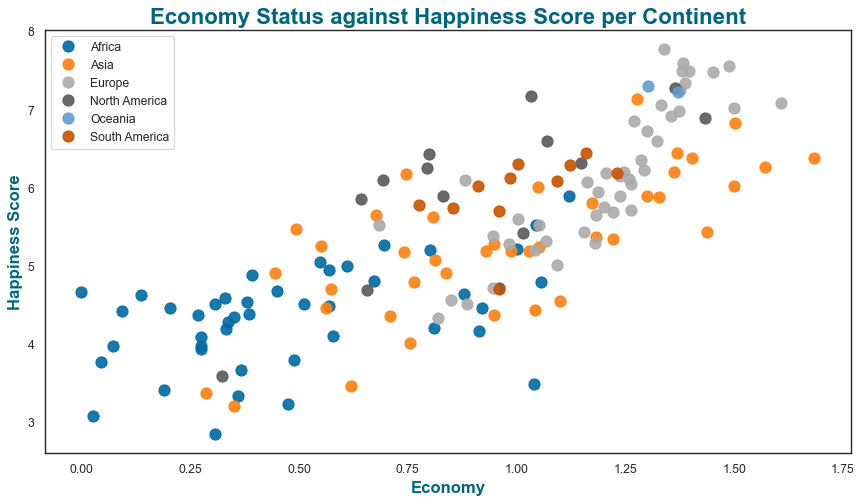

In [47]:
fig_dims = (13, 7)
fig, ax = plt.subplots(figsize=fig_dims,  dpi=80)

plt.style.use('tableau-colorblind10') #style.available
groups = df4.groupby("Continent")
for name, group in groups:
    plt.plot(group["Economy"], group["Happiness_Score"], marker="o", linestyle='', label=name, ms=10, alpha=0.9)
    
ax.set_xlabel('Economy', color='#006680', fontsize=15, fontweight='bold')
ax.set_ylabel('Happiness Score', color='#006680', fontsize=15, fontweight='bold')
ax.set_title('Economy Status against Happiness Score per Continent', color='#006680', fontweight='bold', fontsize=20);

plt.legend();

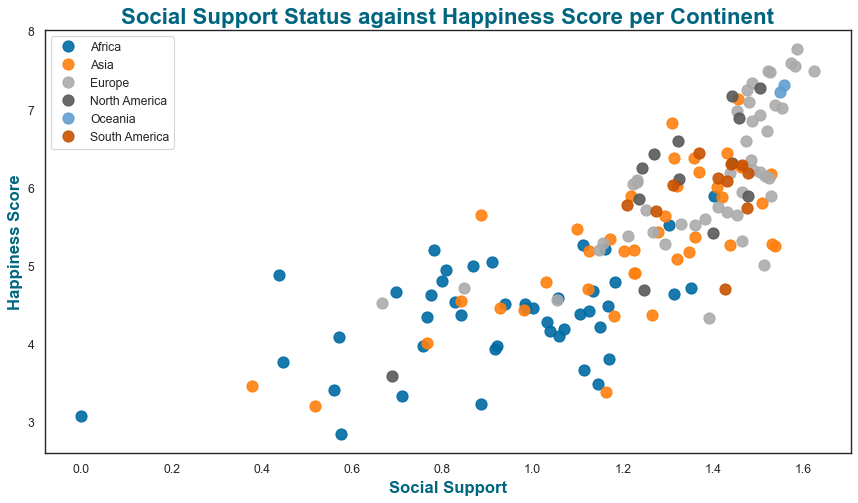

In [49]:
fig_dims = (13, 7)
fig, ax = plt.subplots(figsize=fig_dims,  dpi=80)

plt.style.use('tableau-colorblind10') #style.available
groups = df4.groupby("Continent")
for name, group in groups:
    plt.plot(group["Social_Support"], group["Happiness_Score"], marker="o", linestyle='', label=name, ms=10, alpha=0.9)
    
ax.set_xlabel('Social Support', color='#006680', fontsize=15, fontweight='bold')
ax.set_ylabel('Happiness Score', color='#006680', fontsize=15, fontweight='bold')
ax.set_title('Social Support Status against Happiness Score per Continent', color='#006680', fontweight='bold', fontsize=20);

plt.legend();

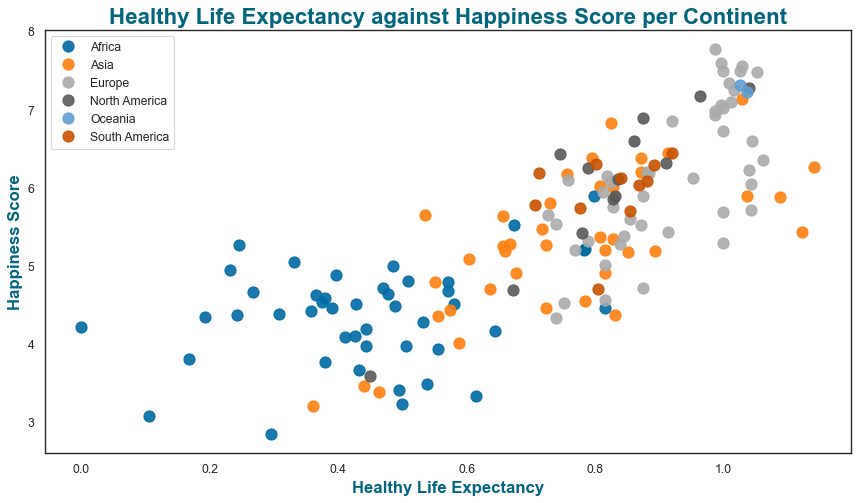

In [51]:
fig_dims = (13, 7)
fig, ax = plt.subplots(figsize=fig_dims,  dpi=80)

plt.style.use('tableau-colorblind10') #style.available
groups = df4.groupby("Continent")
for name, group in groups:
    plt.plot(group["Health"], group["Happiness_Score"], marker="o", linestyle='', label=name, ms=10, alpha=0.9)
    
ax.set_xlabel('Healthy Life Expectancy', color='#006680', fontsize=15, fontweight='bold')
ax.set_ylabel('Happiness Score', color='#006680', fontsize=15, fontweight='bold')
ax.set_title('Healthy Life Expectancy against Happiness Score per Continent', color='#006680', fontweight='bold', fontsize=20);

plt.legend();

## Strong factor-to-factor relationship
Regression plots were also made/ for the high factor-to-factor correlations/ to observe the values.
The regression line indicates an upward trend and proves strong correlation.

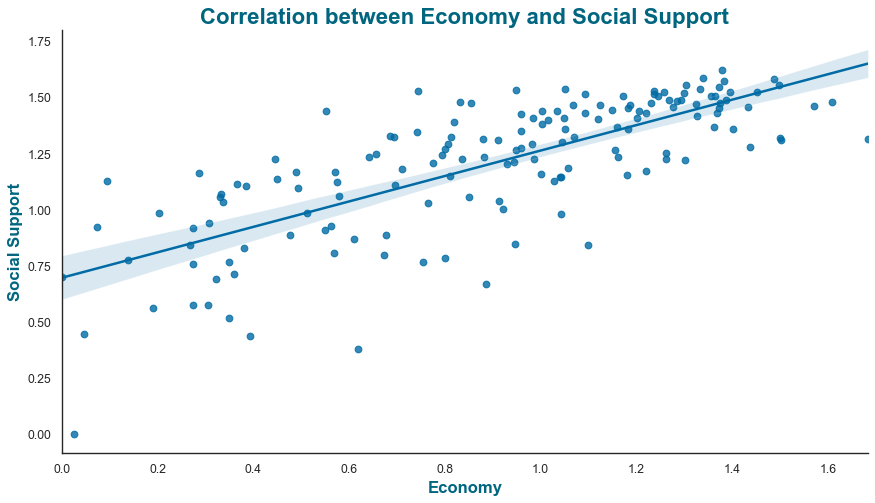

In [53]:
plt.style.use('tableau-colorblind10')

fig_dims = (13, 7)
fig, ax = plt.subplots(figsize=fig_dims, dpi=80)

sns.regplot(x='Economy',y='Social_Support', data=df4)
sns.set(style="white")
plt.xticks(rotation=90)

ax.set_title('Correlation between Economy and Social Support', color='#006680', fontweight='bold', fontsize=20)
ax.set_xlabel('Economy', color='#006680', fontsize=15, fontweight='bold');
ax.set_ylabel('Social Support', color='#006680', fontsize=15, fontweight='bold');
plt.xticks(rotation=0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

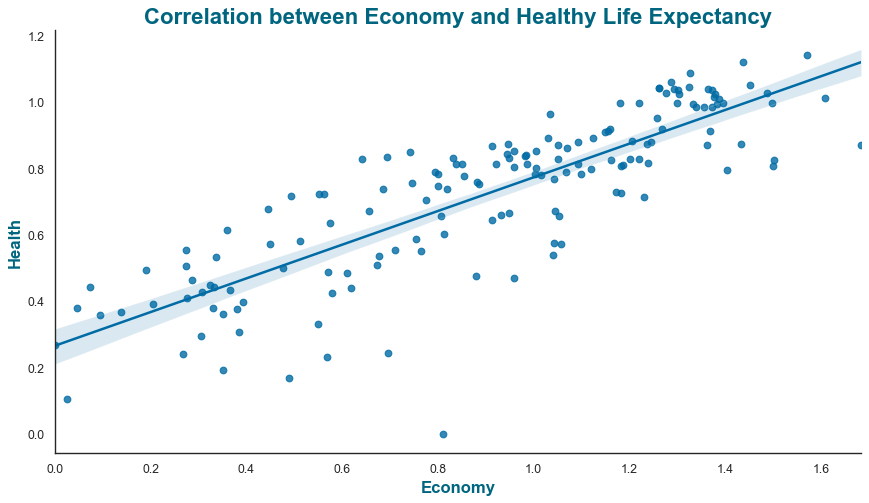

In [54]:
plt.style.use('tableau-colorblind10')

fig_dims = (13, 7)
fig, ax = plt.subplots(figsize=fig_dims, dpi=80)

sns.regplot(x='Economy',y='Health', data=df4)
sns.set(style="white")
plt.xticks(rotation=90)

ax.set_title('Correlation between Economy and Healthy Life Expectancy', color='#006680', fontweight='bold', fontsize=20)
ax.set_xlabel('Economy', color='#006680', fontsize=15, fontweight='bold');
ax.set_ylabel('Health', color='#006680', fontsize=15, fontweight='bold');
plt.xticks(rotation=0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

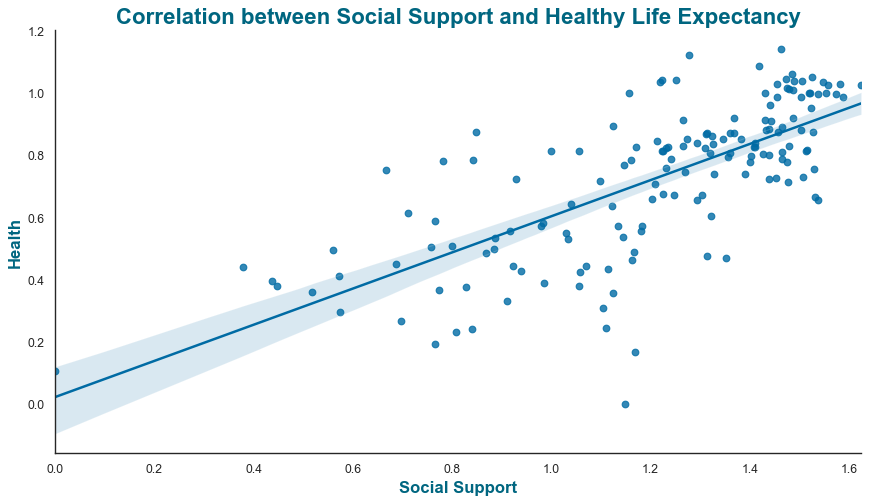

In [57]:
plt.style.use('tableau-colorblind10')

fig_dims = (13, 7)
fig, ax = plt.subplots(figsize=fig_dims, dpi=80)

sns.regplot(x='Social_Support',y='Health', data=df4)
sns.set(style="white")
plt.xticks(rotation=90)

ax.set_title('Correlation between Social Support and Healthy Life Expectancy', color='#006680', fontweight='bold', fontsize=20)
ax.set_xlabel('Social Support', color='#006680', fontsize=15, fontweight='bold');
ax.set_ylabel('Health', color='#006680', fontsize=15, fontweight='bold');
plt.xticks(rotation=0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)